In [2]:
import pandas as pd
import sqlite3

In [4]:
df = pd.read_csv('data.csv')

In [5]:
conn = sqlite3.connect('spotify.db')

In [6]:
df.to_sql('spotify_tracks', conn, if_exists='replace', index=False)

169909

In [7]:
print("Loaded into SQLite as 'spotify_tracks'")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Loaded into SQLite as 'spotify_tracks'
Shape: (169909, 19)
Columns: ['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year']


In [9]:
query1 = """
SELECT name, artists, popularity, year
FROM spotify_tracks
WHERE popularity IS NOT NULL
ORDER BY popularity DESC
LIMIT 10;
"""

top_songs = pd.read_sql_query(query1, conn)
top_songs

,name,artists,popularity,year
0,Blinding Lights,['The Weeknd'],100,2020
1,ROCKSTAR (feat. Roddy Ricch),"['DaBaby', 'Roddy Ricch']",99,2020
2,death bed (coffee for your head) (feat. beabad...,"['Powfu', 'beabadoobee']",97,2020
3,THE SCOTTS,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",96,2020
4,The Box,['Roddy Ricch'],95,2019
5,Supalonely,"['BENEE', 'Gus Dapperton']",95,2019
6,ily (i love you baby) (feat. Emilee),"['Surf Mesa', 'Emilee']",95,2019
7,Toosie Slide,['Drake'],95,2020
8,Dance Monkey,['Tones And I'],94,2019
9,Party Girl,['StaySolidRocky'],94,2020


In [12]:
query2 = """
SELECT artists, COUNT(*) AS num_tracks
FROM spotify_tracks
GROUP BY artists
ORDER BY num_tracks DESC
LIMIT 10;
"""

top_artists = pd.read_sql_query(query2, conn)
top_artists

,artists,num_tracks
0,['Эрнест Хемингуэй'],1215
1,['Francisco Canaro'],938
2,['Эрих Мария Ремарк'],781
3,['Ignacio Corsini'],620
4,['Frank Sinatra'],592
5,['Bob Dylan'],539
6,['The Rolling Stones'],512
7,['Johnny Cash'],502
8,['The Beach Boys'],491
9,['Elvis Presley'],488


In [13]:
query3 = """
SELECT artists, 
       COUNT(*) AS num_tracks, 
       AVG(popularity) AS avg_popularity
FROM spotify_tracks
WHERE popularity IS NOT NULL
GROUP BY artists
HAVING COUNT(*) >= 10
ORDER BY avg_popularity DESC
LIMIT 10;
"""

popular_artists = pd.read_sql_query(query3, conn)
popular_artists

,artists,num_tracks,avg_popularity
0,['Billie Eilish'],30,78.800000
1,['Harry Styles'],26,77.038462
2,['Lewis Capaldi'],14,76.857143
3,['Bad Bunny'],30,74.866667
4,['Anuel AA'],12,74.083333
5,['Dua Lipa'],24,73.833333
6,['Lil Mosey'],10,73.700000
7,['Juice WRLD'],40,72.675000
8,['Maluma'],11,72.545455
9,['Jeremy Zucker'],10,72.400000


In [14]:
query4 = """
SELECT name, artists, popularity, danceability
FROM spotify_tracks
WHERE popularity IS NOT NULL AND danceability IS NOT NULL;
"""

dance_pop = pd.read_sql_query(query4, conn)
dance_pop.head()

,name,artists,popularity,danceability
0,Singende Bataillone 1. Teil,['Carl Woitschach'],0,0.708
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",0,0.379
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],0,0.749
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],0,0.781
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",1,0.210


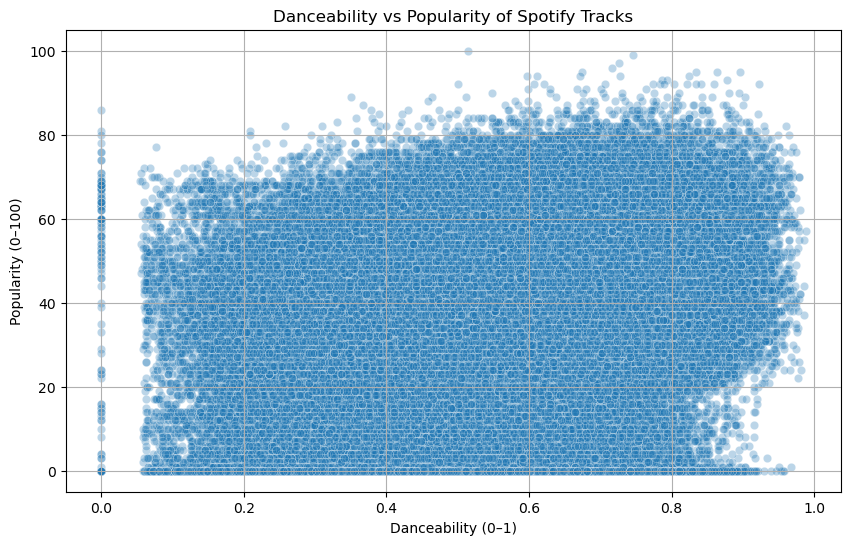

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=dance_pop, x='danceability', y='popularity', alpha=0.3)
plt.title("Danceability vs Popularity of Spotify Tracks")
plt.xlabel("Danceability (0–1)")
plt.ylabel("Popularity (0–100)")
plt.grid(True)
plt.show()

In [16]:
query5 = """
SELECT name, artists, popularity, valence
FROM spotify_tracks
WHERE popularity IS NOT NULL AND valence IS NOT NULL;
"""

valence_pop = pd.read_sql_query(query5, conn)
valence_pop.head()

,name,artists,popularity,valence
0,Singende Bataillone 1. Teil,['Carl Woitschach'],0,0.7790
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",0,0.0767
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],0,0.8800
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],0,0.7200
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",1,0.0693


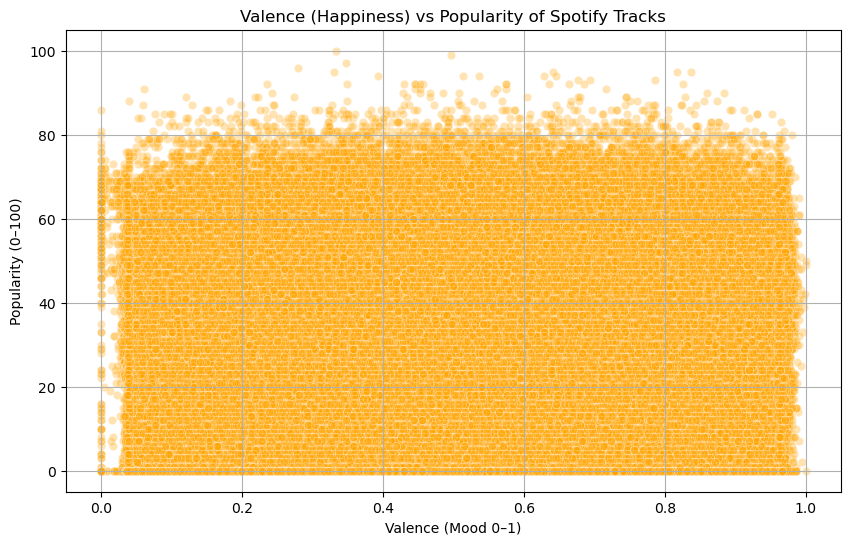

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=valence_pop, x='valence', y='popularity', alpha=0.3, color='orange')
plt.title("Valence (Happiness) vs Popularity of Spotify Tracks")
plt.xlabel("Valence (Mood 0–1)")
plt.ylabel("Popularity (0–100)")
plt.grid(True)
plt.show()